# Regression Assignment:


## Q1: Use the same dataset used in the source code (House_dataset.csv).

In [157]:
#importing libraries and dataset 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
train = pd.read_csv('./houses_dataset.csv')

In [158]:
#checking first rows from dataset
train.head(5)
#checking the amout of null values
train[train.columns[train.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [159]:
# removing missing values
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
print(sum(data.isnull().sum() != 0))

0


### a. Delete all outlier data for the GarageArea field.

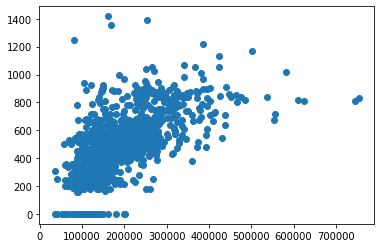

In [160]:
# plotting SalePrice and GarageArea features
plt.scatter(data['SalePrice'], data['GarageArea'])

In [161]:
# observing on the scatter plot, SalePrice more than 500000 
# and GarageArea more than 1200 can be counted as outlier
index_names = data[ (data['GarageArea'] > 1200) | (data['SalePrice'] > 500000)].index
data.drop(index_names, inplace=True)
train.drop(index_names, inplace=True)


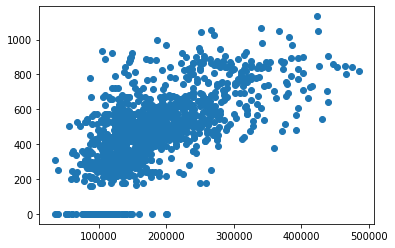

In [162]:
# plotting SalePrice and GarageArea after removing outliers
plt.scatter(data['SalePrice'], data['GarageArea'])

### b. Using simple regression select one feature that is positively correlated with ‘SalePrice’ create a regression model and plot the regression line between the two features.

In [163]:
#building model of overall quality and sale price
ds = data[['OverallQual', 'SalePrice']]
#x stores the OverallQual
x = ds.iloc[:, :-1].values
#y stores the SalePrice
y = ds.iloc[:, -1].values

In [164]:
# splitting train and test data 70:30
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [165]:
x.shape

(1446, 1)

In [168]:
# creating linear regression
reg = LinearRegression()
#fitting the x train on y train
reg.fit(X_train, y_train)
#calculating the prediction y_pred for x_test value
y_pred = reg.predict(X_test)
#calculating the prediction x_pred for x_train value
x_pred = reg.predict(X_train)

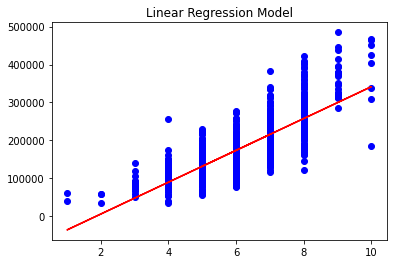

In [170]:
# visualizing the train model
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, x_pred, color='red')
plt.title('Linear Regression Model')
plt.show()

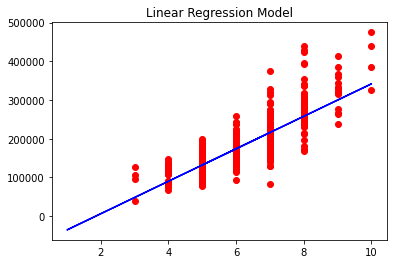

In [171]:
# visualizing the test model
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, x_pred, color='blue')
plt.title('Linear Regression Model')
plt.show()

In [ ]:
#evalutating first models
#Mean Squared Error:
MSE = mean_squared_error(y_test,y_pred)
#Root Mean Squared Error:
RMSE = math.sqrt(MSE)
#Mean Absolute Error
MAE = mean_absolute_error(y_test,y_pred)
# R Squared
R2 = r2_score(y_test,y_pred)
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('MAE: {}'.format(MAE))
print('R2: {}'.format(R2))

### c. Find top 5 most correlated features to the target label(SalePrice) and then build a model using those 5 features.

In [ ]:
# selecting numeric features
numeric_features = data.select_dtypes(include=[np.number])
corr = numeric_features.corr()
# printing positive correlation features with SalePrice
print("Positive Correlation:")
print(corr['SalePrice'].sort_values(ascending=False)[:])
# printing negative correlation features with SalePrice
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

In [ ]:
# OverallQual, GrLivArea, GarageCars, GarageArea, and TotalBsmtSF    
# are the top 5 most correlated features with sale price
# creating new dataset
data = train[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','GarageArea','SalePrice']]

In [ ]:
# splitting train and test set 70:30
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [ ]:
# scaling features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# applying linear regression
reg = LinearRegression()
reg.fit(X_train, y_train)
# predicting the test
y_pred = reg.predict(X_test)

In [ ]:
#evalutating second models
#Mean Squared Error:
MSE = mean_squared_error(y_test,y_pred)
#Root Mean Squared Error:
RMSE = math.sqrt(MSE)
#Mean Absolute Error
MAE = mean_absolute_error(y_test,y_pred)
# R Squared
R2 = r2_score(y_test,y_pred)
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('MAE: {}'.format(MAE))
print('R2: {}'.format(R2))

### d. Apply PCA on the same dataset then apply regression model on the PCA result and report your observation after you evaluate the model.


In [ ]:
# applying PCA using 2 components
# meaning that scikit-learn choose 2 of principal components
pca = PCA(n_components = 2) 
# fit transform x_train
PCAx = pca.fit_transform(X_train)
# transform x_test
PCAx_test = pca.transform(X_test)
# creating dataframe with 2 pca columns
principalDf = pd.DataFrame(data =PCAx
             , columns = ['PCA_1', 'PCA_2'])

In [ ]:
principalDf

In [ ]:
# fitting PCAx on y_train
reg.fit(PCAx, y_train)
# calculating prediction PCAx_test
y_pred = reg.predict(PCAx_test)

In [ ]:
#evalutating third model
#Mean Squared Error:
MSE = mean_squared_error(y_test,y_pred)
#Root Mean Squared Error:
RMSE = math.sqrt(MSE)
#Mean Absolute Error:
MAE = mean_absolute_error(y_test,y_pred)
# R squared
R2 = r2_score(y_test,y_pred)
print('MSE: {}'.format(MSE))
print('RMSE: {}'.format(RMSE))
print('MAE: {}'.format(MAE))
print('R2: {}'.format(R2))